In [67]:
# Please run the below command to install the required packages for excel file reading
# pip install openpxl

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [68]:
# Read the data from the  Excel Sheet.
data = pd.read_excel('Data_SVM.xlsx')

# Convert the data from str to float
data = data.astype(float)

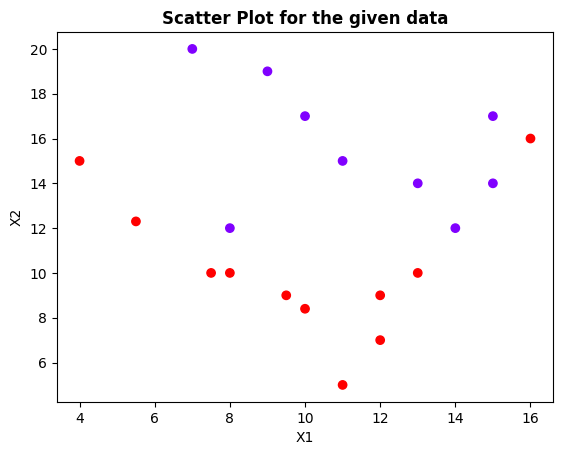

In [69]:
# 1. Plot the Data Using Scatter Plot with appropriate colorings for each class [2 Marks]
import matplotlib.pyplot as plt
plt.scatter(data['X1'], data['X2'], c=data['Y'], cmap='rainbow')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot for the given data', fontweight='bold')    
plt.show()

In [70]:
# 2. Create SVM model for the given data. (Use misclassification penalty (C)) [2 Marks]
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
clf.fit(data[['X1', 'X2']], data['Y'])

SVC(C=1, kernel='linear')

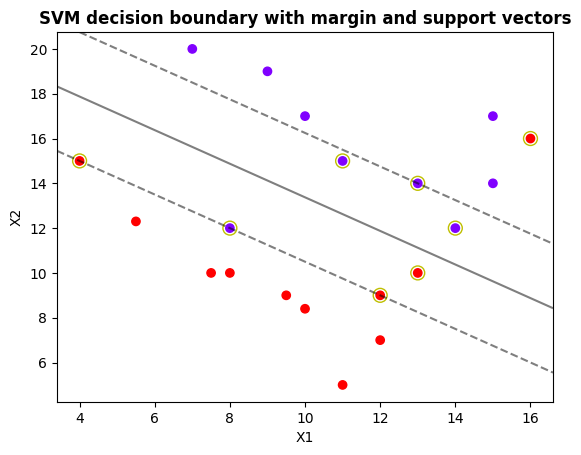

In [71]:
# 3. Plot the Data and SVM decision boundary along with the margins and support vectors. [3 Marks]
plt.scatter(data['X1'], data['X2'], c=data['Y'], cmap='rainbow')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Grid Model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Decision Boundary and Margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Support Vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='y')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM decision boundary with margin and support vectors', fontweight='bold')  
plt.show()

In [72]:
# 4. Predict the label for data points below and plot them as well with data, decision boundary and support vectors. [3 Marks]
# a. [8 15], b. [7 4]

# Predict the label for data points a and b
a = clf.predict([[8, 15]])
b = clf.predict([[7, 4]])
print(a)
print(b)
print('[8, 15] belongs to class blue', a)
print('[7, 4] belongs to class red', b)

[-1.]
[1.]
[8, 15] belongs to class blue [-1.]
[7, 4] belongs to class red [1.]


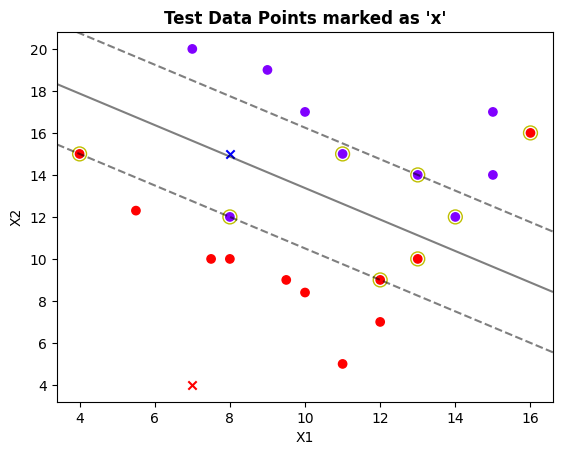

In [73]:
# Plot the data points a and b in the same as the above plot
plt.scatter(data['X1'], data['X2'], c=data['Y'], cmap='rainbow')
plt.scatter(8, 15, c='blue', marker='x')
plt.scatter(7, 4, c='red', marker='x')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Grid Model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Decision Boundary and Margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Support Vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='y')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Test Data Points marked as 'x'", fontweight='bold')  
plt.show()